https://stepik.org/lesson/1370126/step/5

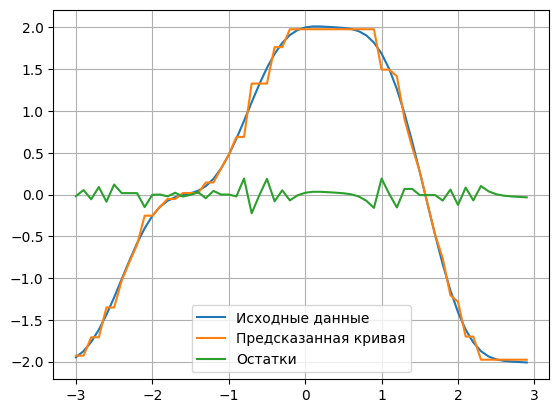

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Данные
x = np.arange(-3, 3, 0.1).reshape(-1, 1)
y = 2 * np.cos(x) + 0.5 * np.sin(2*x) - 0.2 * np.sin(4*x)

# Параметры
T = 6
max_depth = 3

s = [yi[0] for yi in y] # Инициализация остатков значениями из y
algs = []               # Список для хранения обученных моделей

# Итеративное обучение деревьев на остатках
for n in range(T):
    tree = DecisionTreeRegressor(max_depth=max_depth)  # Создаем дерево
    tree.fit(x, s)          # Обучаем на текущих остатках
    algs.append(tree)       # Сохраняем обученную модель
    s -= tree.predict(x)    # Обновляем остатки, вычитая предсказания модели

# Качество
QT = (s**2).mean()

'''Графики'''
# Восстанавливаем предсказания, суммируя результаты всех деревьев
yy = np.zeros_like(y.ravel())  # Инициализируем массив предсказаний
for tree in algs:
    yy += tree.predict(x)  # Добавляем предсказания каждого дерева


plt.plot(x, y, label="Исходные данные")  # Исходный график
plt.plot(x, yy, label="Предсказанная кривая")  # Восстановленный график
plt.plot(x, s, label="Остатки")  # Остаточный сигнал
plt.legend()
plt.grid()
plt.show()